In [1]:
import pickle
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
import time

In [2]:
def conf_interval(total_true, total_population, a = 0.01, method = 'normal'):
    return sm.stats.proportion_confint(total_true, total_population, a, method)

In [3]:
with open('./metadata/fit_non_fit_vars/dec-02-08-removed-home-work-same-week.pkl', 'rb') as f: 
    fits, non_fits, total_fit,total_non_fit = pickle.load(f)

In [4]:
conf_active_all = []
conf_non_active_all = []
active_results_all = []
non_active_results_all = []

In [5]:
indexes = [0,-1,2,1,3,4] # The order for which they will appear in the boxplot later
for i in range(6):
    temp = conf_interval(sum(fits[indexes[i]]), sum(total_fit), 0.01)
    conf_active_all += [(temp[1]-temp[0])/2]
    temp = conf_interval(sum(non_fits[indexes[i]]), sum(total_non_fit), 0.01)
    conf_non_active_all += [(temp[1]-temp[0])/2]
    active_results_all += [sum(fits[indexes[i]])/sum(total_fit)]
    non_active_results_all += [sum(non_fits[indexes[i]])/sum(total_non_fit)]

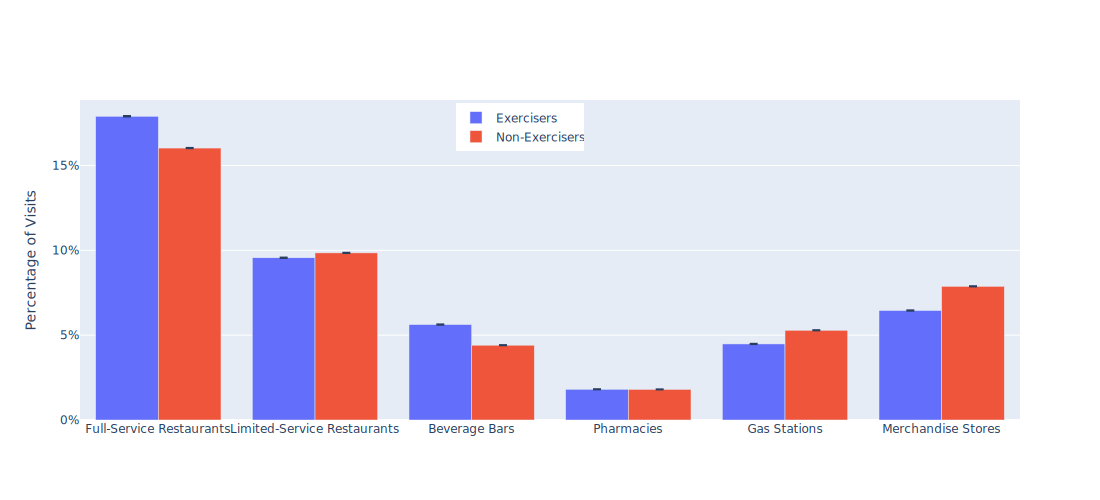

In [6]:
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Exercisers',
    x=["Full-Service Restaurants", "Limited-Service Restaurants", "Beverage Bars", "Pharmacies", "Gas Stations", "Merchandise Stores"], y=active_results_all,
    error_y=dict(type='data', array=conf_active_all)
))

fig.add_trace(go.Bar(
    name='Non-Exercisers',
    x=["Full-Service Restaurants", "Limited-Service Restaurants", "Beverage Bars", "Pharmacies", "Gas Stations", "Merchandise Stores"], y=non_active_results_all,
    error_y=dict(type='data', array=conf_non_active_all)
))

fig.update_layout(barmode='group', yaxis_title = "Percentage of Visits",     width=1100)
fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.40
))
fig.update_yaxes(tickformat=".0%")
fig.show("svg")

In [8]:
fig.write_image("dec-02-08-fitnonfit.pdf")